In [13]:
import os
import sys

sys.path.append("..")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from mvae.multiscale_vae_ import MultiscaleVae

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [14]:
# run params
SECTION = "vae"
RUN_ID = "0001"
DATA_NAME = "cifar10"
BASE_DIR= "./run"
BASE_DIR_SECTION = "{0}/{1}/".format(BASE_DIR, SECTION)
RUN_FOLDER = BASE_DIR_SECTION + "_".join([RUN_ID, DATA_NAME])

if not os.path.exists(BASE_DIR):
    os.mkdir(BASE_DIR)
    
if not os.path.exists(BASE_DIR_SECTION):
    os.mkdir(BASE_DIR_SECTION)
    
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, "viz"))
    os.mkdir(os.path.join(RUN_FOLDER, "images"))
    os.mkdir(os.path.join(RUN_FOLDER, "weights"))

mode = "build"

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

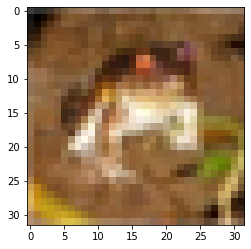

In [16]:
# Display original
plt.figure()
plt.imshow(x_train[0,:,:,:]) 
plt.show()  

In [17]:
multiscale_vae = MultiscaleVAE(
    input_dims=(32,32,3), 
    z_dims=[16, 64, 256],
    encoder={
        "filters": [64, 64, 64, 64, 32],
        "kernel_size": [(5, 5), (3, 3), (3, 3,), (1, 1), (1, 1)],
        "strides": [(2, 2), (1, 1), (1, 1), (1, 1), (1, 1)]
            },
    decoder={
        "filters":[64, 64, 64, 64, 32],
        "kernel_size": [(5, 5), (3, 3), (3, 3,), (1, 1), (1, 1)],
        "strides": [(2, 2), (1, 1), (1, 1), (1, 1), (1, 1)]
    })

2023-09-18 13:12:26,395 INFO multiscale_vae.py:_build:109] Building multiscale input
2023-09-18 13:12:26,395 INFO multiscale_vae.py:_build:167] Building encoder
2023-09-18 13:12:26,396 INFO multiscale_vae.py:_build:173] Encoder scale [0]
2023-09-18 13:12:27,254 INFO multiscale_vae.py:_build:173] Encoder scale [1]
2023-09-18 13:12:27,366 INFO multiscale_vae.py:_build:173] Encoder scale [2]
2023-09-18 13:12:27,621 INFO multiscale_vae.py:_build:188] Building decoder
2023-09-18 13:12:27,621 INFO multiscale_vae.py:_build:191] Decoder scale [0]
2023-09-18 13:12:27,739 INFO multiscale_vae.py:_build:191] Decoder scale [1]
2023-09-18 13:12:27,853 INFO multiscale_vae.py:_build:191] Decoder scale [2]
2023-09-18 13:12:27,964 INFO multiscale_vae.py:_build:203] Building merge decoder
2023-09-18 13:12:28,003 INFO multiscale_vae.py:_build:227] Building encoder model
2023-09-18 13:12:28,163 INFO multiscale_vae.py:_build:246] Building decoder model
2023-09-18 13:12:28,369 INFO multiscale_vae.py:_build:2

In [18]:
LEARNING_RATE = 0.001
R_LOSS_FACTOR = 1000
KL_LOSS_FACTOR = 10

In [19]:
multiscale_vae.compile(
    learning_rate=LEARNING_RATE, 
    r_loss_factor=R_LOSS_FACTOR,
    kl_loss_factor=KL_LOSS_FACTOR
)

In [20]:
EPOCHS = 50
BATCH_SIZE = 32
PRINT_EVERY_N_BATCHES = 1000
INITIAL_EPOCH = 0

In [21]:
# serialize model to JSON
model_json = multiscale_vae.model_trainable.to_json()
with open("model_trainable.json", "w") as json_file:
    json_file.write(model_json)

AttributeError: 'MultiscaleVAE' object has no attribute 'model_predict'

In [ ]:
multiscale_vae.train(     
    x_train, 
    batch_size = BATCH_SIZE, 
    epochs = EPOCHS, 
    run_folder = RUN_FOLDER, 
    print_every_n_batches = PRINT_EVERY_N_BATCHES, 
    initial_epoch = INITIAL_EPOCH,
    step_size=10,
    lr_decay=0.5
)

In [ ]:
results = multiscale_vae.model_predict.predict(x_train[0:10,:,:,:])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[0,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[0,:,:,:])
plt.xlabel("recovery")
plt.show() 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[1,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[1,:,:,:])
plt.xlabel("recovery")
plt.show() 

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[2,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[2,:,:,:])
plt.xlabel("recovery")
plt.show() 